<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [17]:
# loading the data: Wholesale customers data

file_path = "../data/Wholesale customers data.csv"  # Replace with your dataset path

# Read the dataset
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None

Summary Statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000     

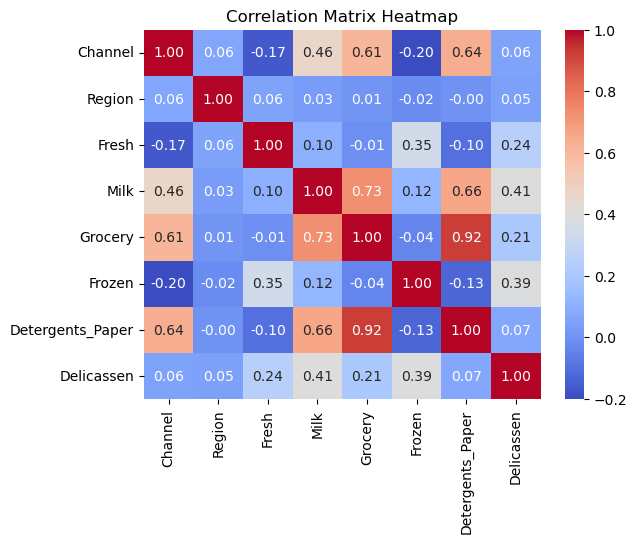

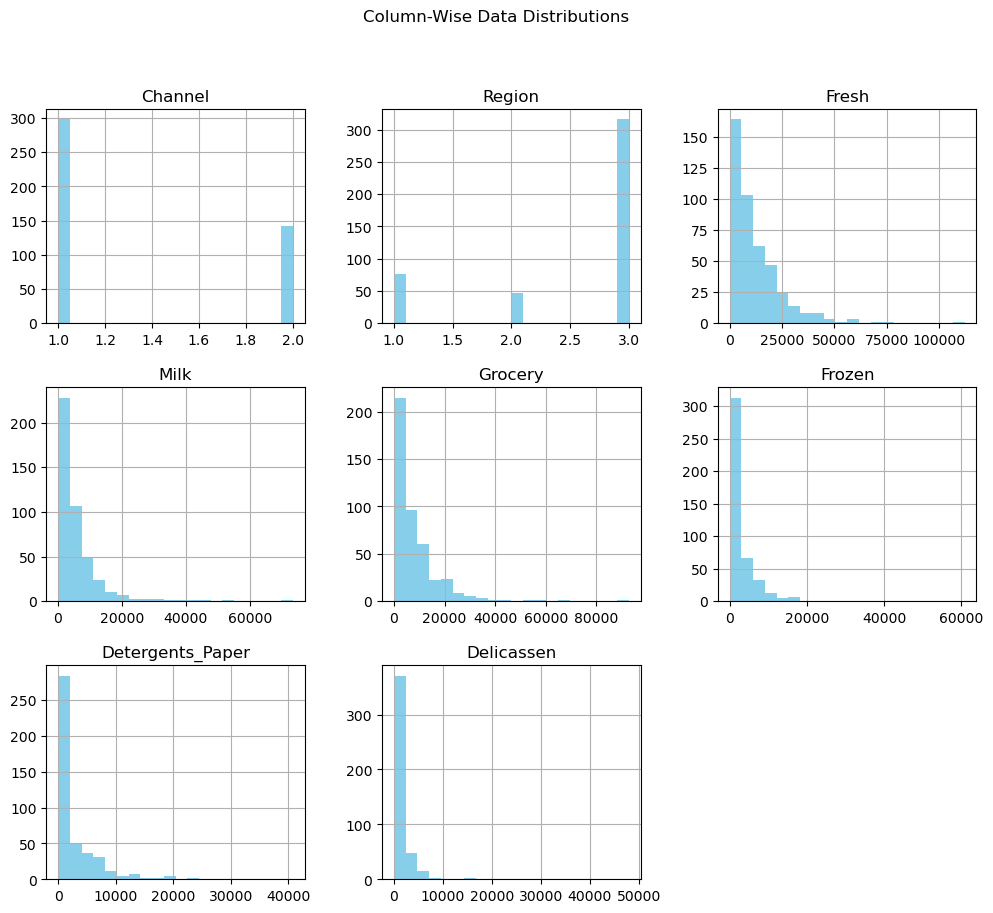


Number of customers contributing to 80% of revenue: 251
Percentage of customers contributing to 80% of revenue: 57.05%


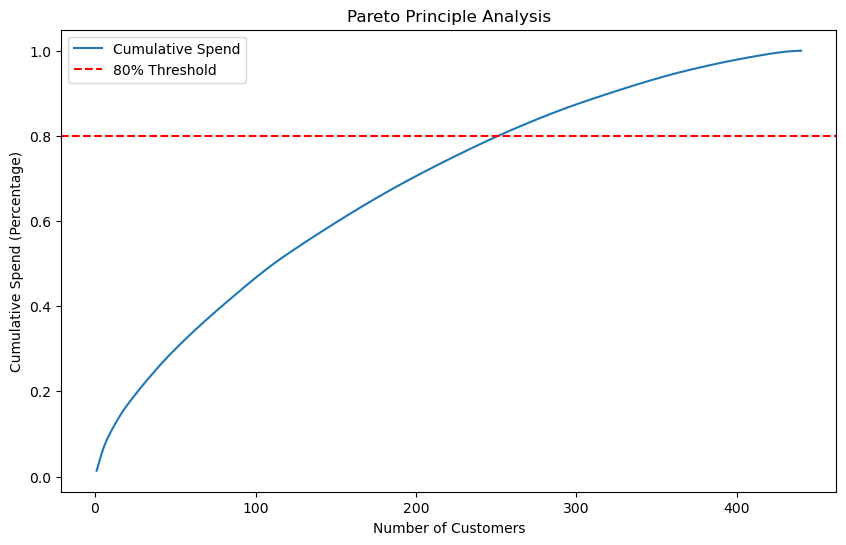

In [18]:
# Display general information about the dataset
print("Dataset Info:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing data
print("\nMissing Values:")
print(data.isnull().sum())

# Check for categorical data
print("\nData Types:")
print(data.dtypes)

# Check for correlations between columns
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Visualize column-wise distributions
data.hist(figsize=(12, 10), bins=20, color="skyblue")
plt.suptitle("Column-Wise Data Distributions")
plt.show()

# Pareto principle analysis
# Check if 20% of customers account for 80% of the total retail sales
total_spend = data.sum(axis=1).sort_values(ascending=False)  # Sum of all spending per customer
cumulative_spend = total_spend.cumsum() / total_spend.sum()  # Cumulative percentage
pareto_threshold = cumulative_spend[cumulative_spend <= 0.8]  # Filter top 80% spenders

print(f"\nNumber of customers contributing to 80% of revenue: {len(pareto_threshold)}")
print(f"Percentage of customers contributing to 80% of revenue: {len(pareto_threshold) / len(data) * 100:.2f}%")

# Plot the Pareto principle
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_spend) + 1), cumulative_spend, label="Cumulative Spend")
plt.axhline(y=0.8, color="r", linestyle="--", label="80% Threshold")
plt.xlabel("Number of Customers")
plt.ylabel("Cumulative Spend (Percentage)")
plt.title("Pareto Principle Analysis")
plt.legend()
plt.show()

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

Missing Values Before Cleaning:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Missing Values After Cleaning:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Data shape after removing outliers: (318, 8)


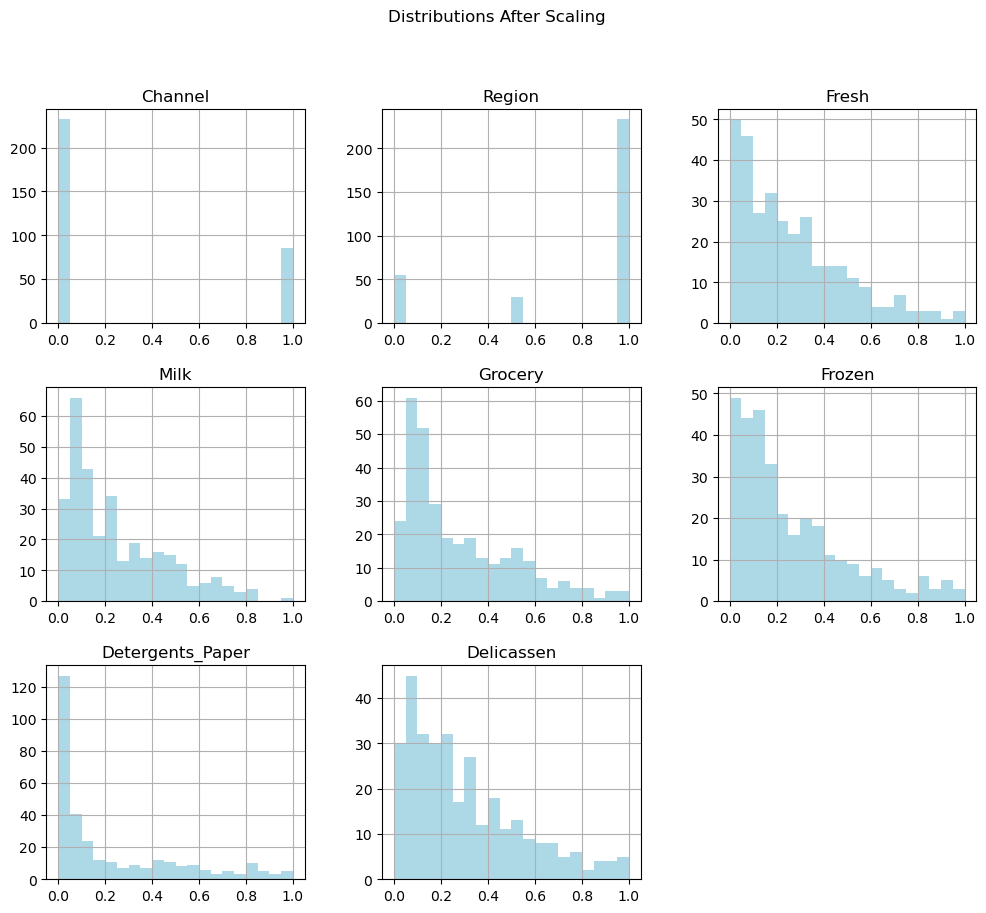

In [19]:
# Handling Missing Data
print("Missing Values Before Cleaning:")
print(data.isnull().sum())

# If there are missing values, decide on a strategy (imputation or removal)
data_cleaned = data.dropna()  # Drop rows with missing values
print("\nMissing Values After Cleaning:")
print(data_cleaned.isnull().sum())

# Detecting and Removing Outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for all numerical columns
for col in data_cleaned.select_dtypes(include=["float64", "int64"]).columns:
    data_cleaned = remove_outliers(data_cleaned, col)

print("\nData shape after removing outliers:", data_cleaned.shape)

# Normalizing or Scaling Numerical Columns (if needed)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_cleaned.select_dtypes(include=["float64", "int64"]))

# Replace scaled values back into a DataFrame
data_cleaned_scaled = pd.DataFrame(scaled_data, columns=data_cleaned.select_dtypes(include=["float64", "int64"]).columns)

# Visualizing distributions after scaling
data_cleaned_scaled.hist(figsize=(12, 10), bins=20, color="lightblue")
plt.suptitle("Distributions After Scaling")
plt.show()

# Transform Skewed Data (if necessary)
from scipy.stats import boxcox

for col in data_cleaned_scaled.columns:
    if data_cleaned_scaled[col].skew() > 1:  # Targeting columns with high skewness
        data_cleaned_scaled[col], _ = boxcox(data_cleaned_scaled[col] + 1)  # Adding 1 to avoid log issues

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

Scaled Data:
    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.642460  0.572024  0.360420  1.740710  0.432714 -0.984801   
1  1.642460  0.572024 -0.325039  1.788015  0.867526 -0.023386   
2 -0.608843  0.572024  0.433216 -0.857996 -0.290889  2.859618   
3  1.642460  0.572024 -0.037274  1.311586 -0.094823 -0.704078   
4  1.642460  0.572024  0.294097 -0.242723  0.305758 -0.819597   

   Detergents_Paper  Delicassen  
0          0.378277    0.451178  
1          0.659241    1.009718  
2         -0.605321    1.025020  
3         -0.020699    0.595276  
4          0.589794   -0.560060  


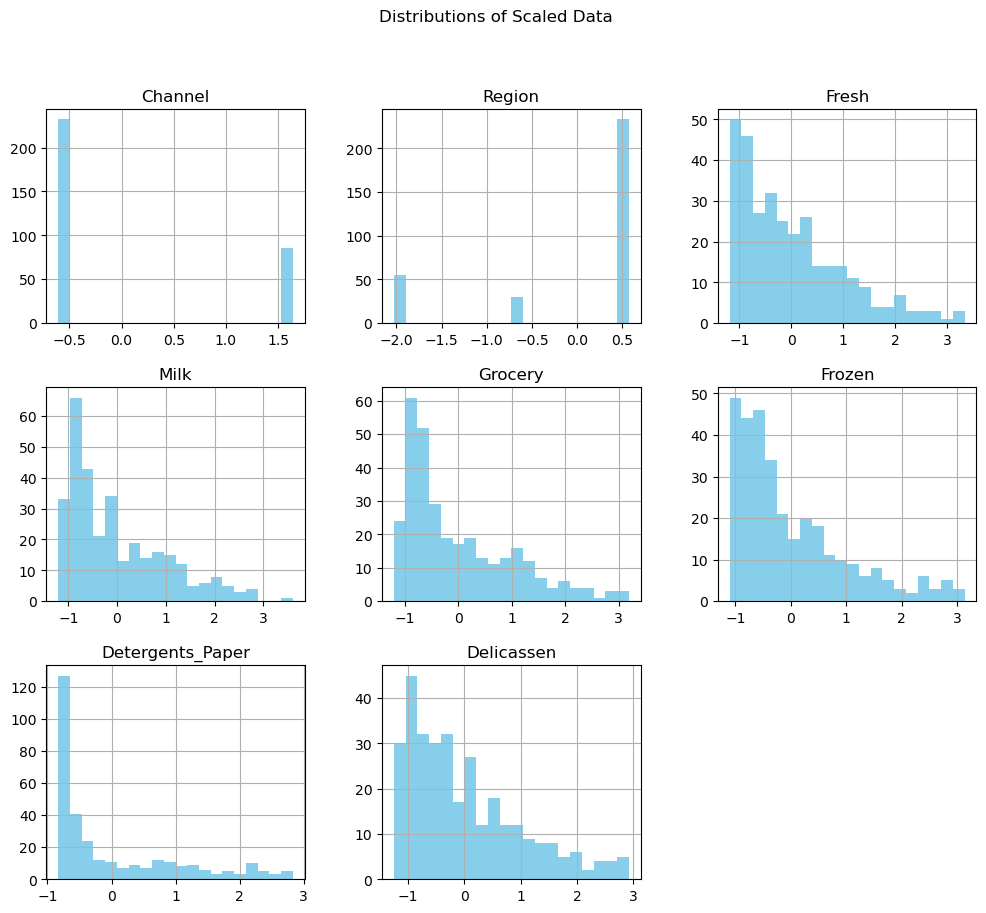

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data (assuming 'data_cleaned' is the dataset after cleaning)
customers_scale = scaler.fit_transform(data_cleaned)

# Convert the scaled data back into a DataFrame for better readability
customers_scale = pd.DataFrame(customers_scale, columns=data_cleaned.columns)

# Display the first few rows of the scaled data
print("Scaled Data:")
print(customers_scale.head())

# Visualizing the distributions of scaled data
customers_scale.hist(figsize=(12, 10), bins=20, color="skyblue")
plt.suptitle("Distributions of Scaled Data")
plt.show()

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

Data with Cluster Labels:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
3        1       3  13265  1196     4221    6404               507   
5        2       3   9413  8259     5126     666              1795   
6        2       3  12126  3199     6975     480              3140   

   Delicassen  labels  
0        1338       1  
1        1776       1  
3        1788       0  
5        1451       1  
6         545       1  


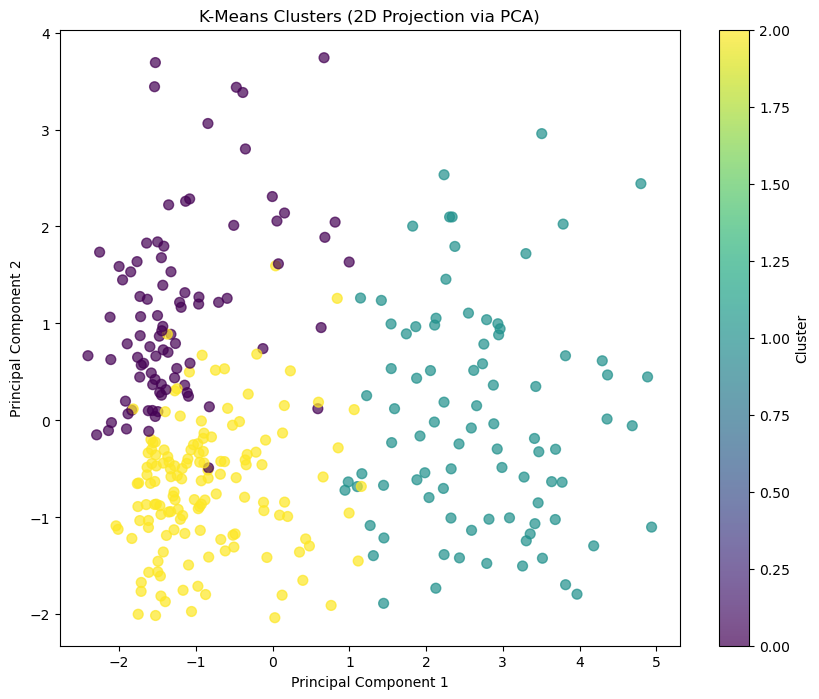

In [21]:
from sklearn.cluster import KMeans

# Initialize the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters

# Fit the scaled data
kmeans.fit(customers_scale)

# Add the cluster labels to the original dataset
data_cleaned['labels'] = kmeans.labels_

# Display the dataset with the cluster labels
print("Data with Cluster Labels:")
print(data_cleaned.head())

# Visualize the clusters (2D visualization using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customers_scale)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.title("K-Means Clusters (2D Projection via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [22]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [25]:
data_cleaned['labels'] = clusters

Count the values in `labels`.

In [28]:
from sklearn.cluster import DBSCAN 

# Count the values in the 'labels' column
label_counts = data_cleaned['labels'].value_counts()

# Display the counts
print("Cluster Label Counts:")
print(label_counts)


Cluster Label Counts:
labels
0    222
1     96
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [27]:
from sklearn.cluster import DBSCAN 

# Your code here


Cluster Label Counts:
labels
0    222
1     96
Name: count, dtype: int64


Count the values in `labels_DBSCAN`.

Data with DBSCAN Cluster Labels:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
3        1       3  13265  1196     4221    6404               507   
5        2       3   9413  8259     5126     666              1795   
6        2       3  12126  3199     6975     480              3140   

   Delicassen  labels  labels_DBSCAN  
0        1338       1             -1  
1        1776       1             -1  
3        1788       0             -1  
5        1451       1             -1  
6         545       1             -1  

DBSCAN Cluster Counts (Including Noise):
labels_DBSCAN
-1    298
 1     13
 0      7
Name: count, dtype: int64


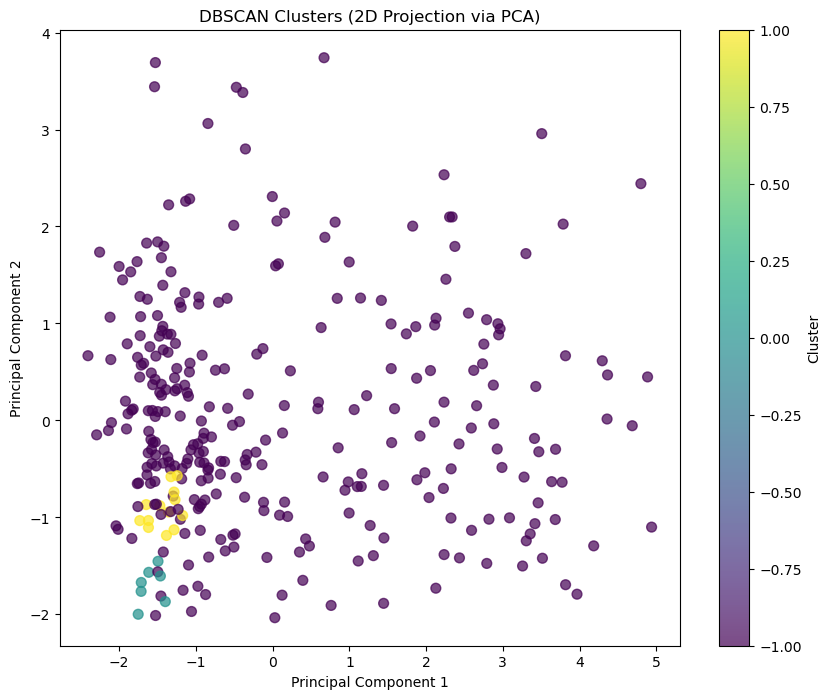

In [29]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model with specified parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` as needed

# Fit the scaled data
dbscan.fit(customers_scale)

# Assign the cluster labels from DBSCAN to the original dataset
data_cleaned['labels_DBSCAN'] = dbscan.labels_

# Display the dataset with DBSCAN cluster labels
print("Data with DBSCAN Cluster Labels:")
print(data_cleaned.head())

# Count the number of points in each cluster (including noise points labeled as -1)
dbscan_label_counts = data_cleaned['labels_DBSCAN'].value_counts()
print("\nDBSCAN Cluster Counts (Including Noise):")
print(dbscan_label_counts)

# Visualize the DBSCAN clusters (2D visualization using PCA)
reduced_data = PCA(n_components=2).fit_transform(customers_scale)  # Using PCA for dimensionality reduction

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan.labels_, cmap='viridis', s=50, alpha=0.7)
plt.title("DBSCAN Clusters (2D Projection via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [30]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

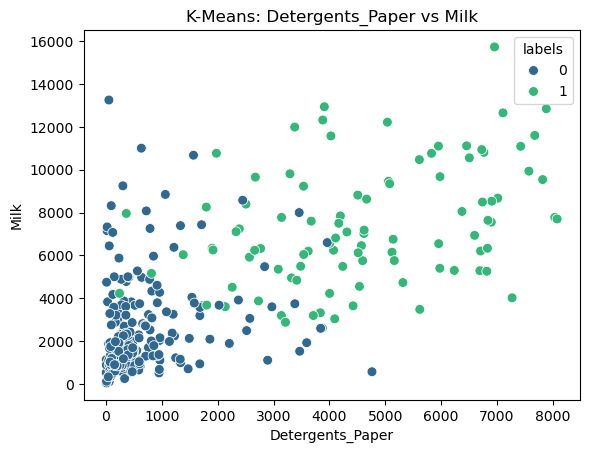

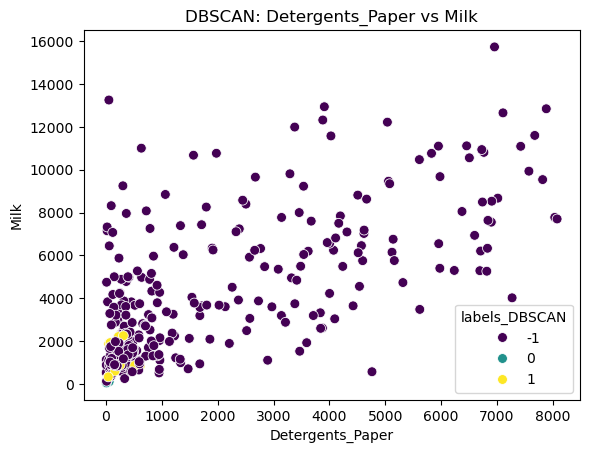

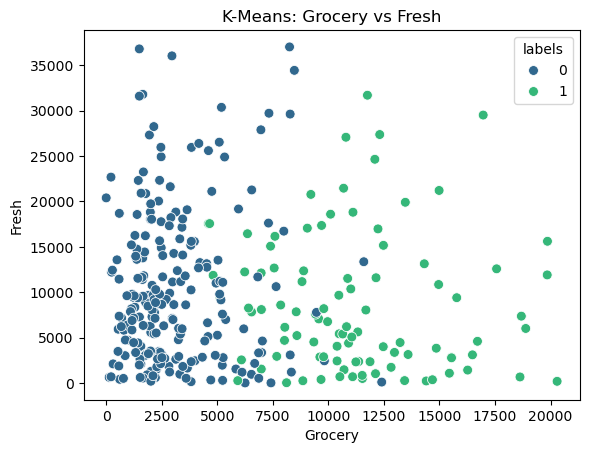

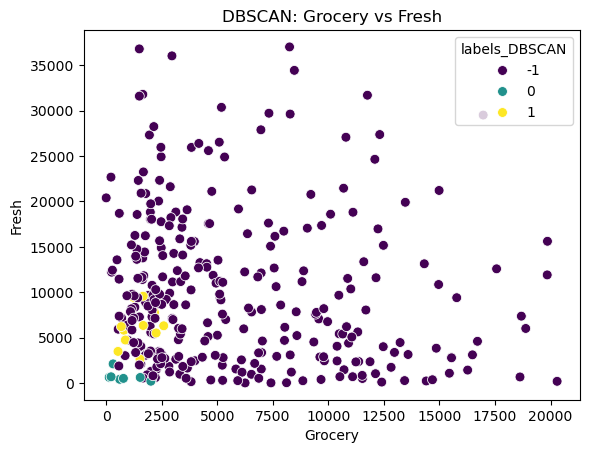

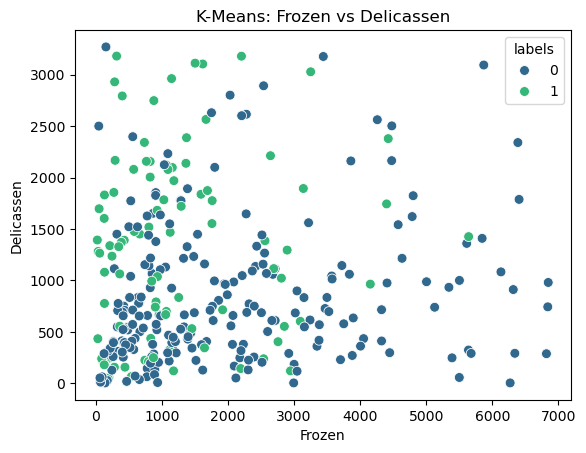

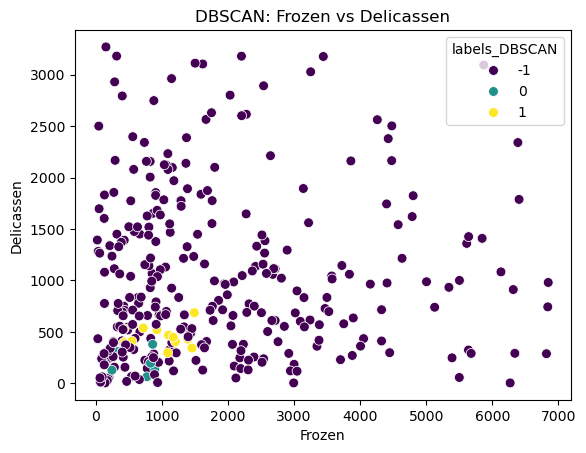

In [30]:
# Define a plotting function for visualizations
def plot(x, y, hue, title):
    sns.scatterplot(data=data_cleaned, x=x, y=y, hue=hue, palette='viridis', s=50)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue)
    return plt.show()

# Visualize Detergents_Paper vs Milk using K-Means labels
plot(x='Detergents_Paper', y='Milk', hue='labels', title='K-Means: Detergents_Paper vs Milk')

# Visualize Detergents_Paper vs Milk using DBSCAN labels
plot(x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', title='DBSCAN: Detergents_Paper vs Milk')

# Visualize Grocery vs Fresh using K-Means labels
plot(x='Grocery', y='Fresh', hue='labels', title='K-Means: Grocery vs Fresh')

# Visualize Grocery vs Fresh using DBSCAN labels
plot(x='Grocery', y='Fresh', hue='labels_DBSCAN', title='DBSCAN: Grocery vs Fresh')

# Visualize Frozen vs Delicassen using K-Means labels
plot(x='Frozen', y='Delicassen', hue='labels', title='K-Means: Frozen vs Delicassen')

# Visualize Frozen vs Delicassen using DBSCAN labels
plot(x='Frozen', y='Delicassen', hue='labels_DBSCAN', title='DBSCAN: Frozen vs Delicassen')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

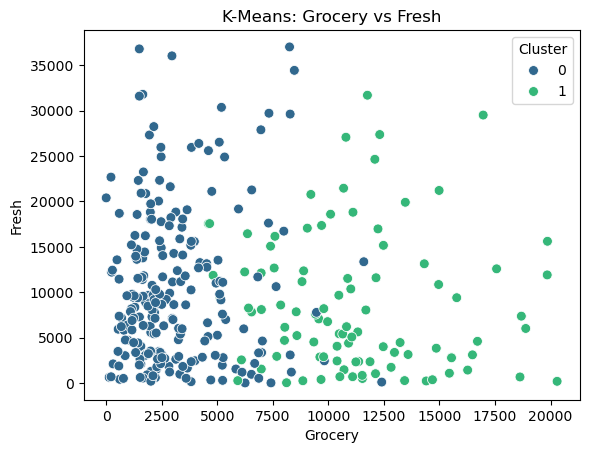

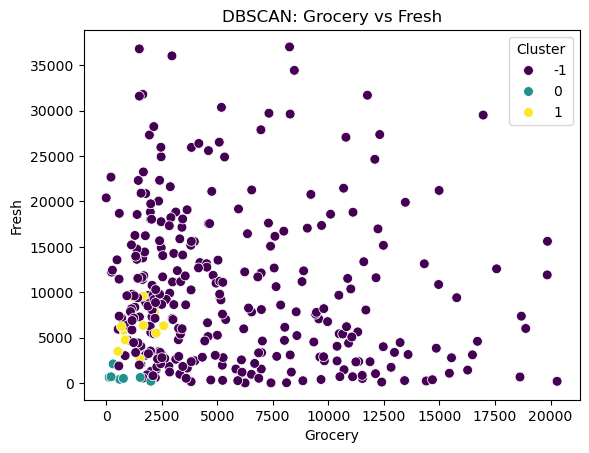

In [31]:
# Visualize Grocery vs Fresh using K-Means labels
sns.scatterplot(data=data_cleaned, x='Grocery', y='Fresh', hue='labels', palette='viridis', s=50)
plt.title("K-Means: Grocery vs Fresh")
plt.xlabel("Grocery")
plt.ylabel("Fresh")
plt.legend(title="Cluster")
plt.show()

# Visualize Grocery vs Fresh using DBSCAN labels
sns.scatterplot(data=data_cleaned, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette='viridis', s=50)
plt.title("DBSCAN: Grocery vs Fresh")
plt.xlabel("Grocery")
plt.ylabel("Fresh")
plt.legend(title="Cluster")
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

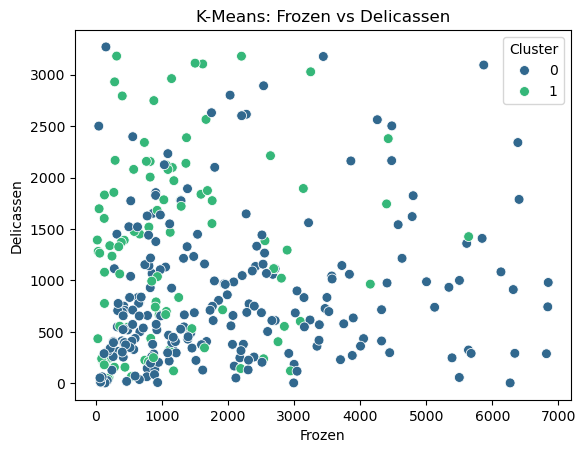

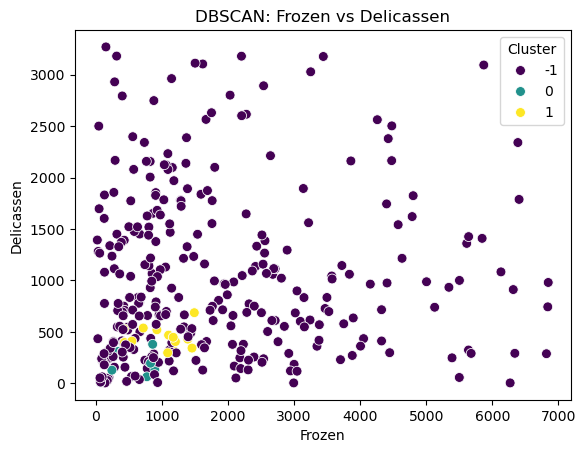

In [32]:
# Visualize Frozen vs Delicassen using K-Means labels
sns.scatterplot(data=data_cleaned, x='Frozen', y='Delicassen', hue='labels', palette='viridis', s=50)
plt.title("K-Means: Frozen vs Delicassen")
plt.xlabel("Frozen")
plt.ylabel("Delicassen")
plt.legend(title="Cluster")
plt.show()

# Visualize Frozen vs Delicassen using DBSCAN labels
sns.scatterplot(data=data_cleaned, x='Frozen', y='Delicassen', hue='labels_DBSCAN', palette='viridis', s=50)
plt.title("DBSCAN: Frozen vs Delicassen")
plt.xlabel("Frozen")
plt.ylabel("Delicassen")
plt.legend(title="Cluster")
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

K-Means Cluster Means:
         Channel    Region         Fresh         Milk       Grocery  \
labels                                                                
0       1.013514  2.490991  10211.081081  2522.518018   3108.603604   
1       1.864583  2.718750   8578.302083  7380.822917  11241.052083   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       2055.815315        644.094595   841.090090      -0.851351  
1       1207.281250       4607.531250  1315.114583      -1.000000  

DBSCAN Cluster Means:
                Channel    Region         Fresh         Milk      Grocery  \
labels_DBSCAN                                                               
-1             1.288591  2.530201  10077.583893  4187.070470  5847.204698   
 0             1.000000  3.000000    729.571429   636.142857   801.000000   
 1             1.000000  3.000000   6319.230769  1258.307692  1629.000000   

           

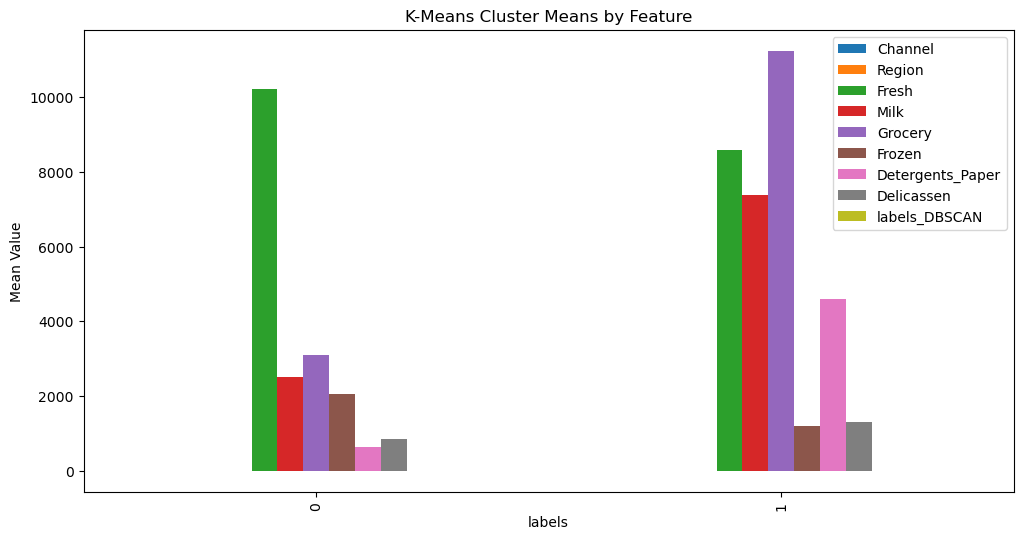

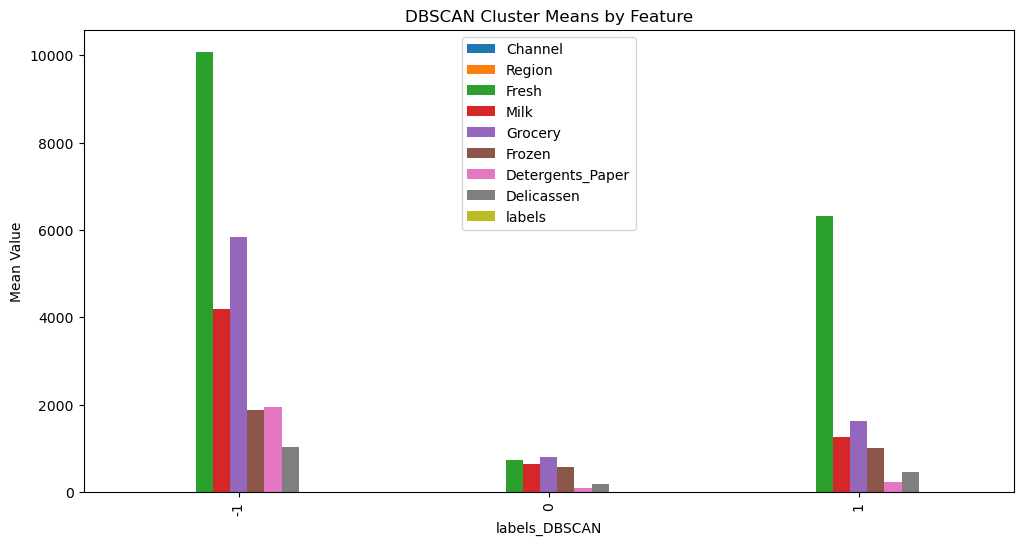

In [33]:
# Grouping by K-Means labels and calculating the mean for all columns
kmeans_group_means = data_cleaned.groupby('labels').mean()
print("K-Means Cluster Means:")
print(kmeans_group_means)

# Grouping by DBSCAN labels and calculating the mean for all columns
dbscan_group_means = data_cleaned.groupby('labels_DBSCAN').mean()
print("\nDBSCAN Cluster Means:")
print(dbscan_group_means)

# Optional: Visualize the means for easier comparison
kmeans_group_means.plot(kind='bar', figsize=(12, 6), title="K-Means Cluster Means by Feature", legend=True)
plt.ylabel("Mean Value")
plt.show()

dbscan_group_means.plot(kind='bar', figsize=(12, 6), title="DBSCAN Cluster Means by Feature", legend=True)
plt.ylabel("Mean Value")
plt.show()

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

<Figure size 1000x600 with 0 Axes>

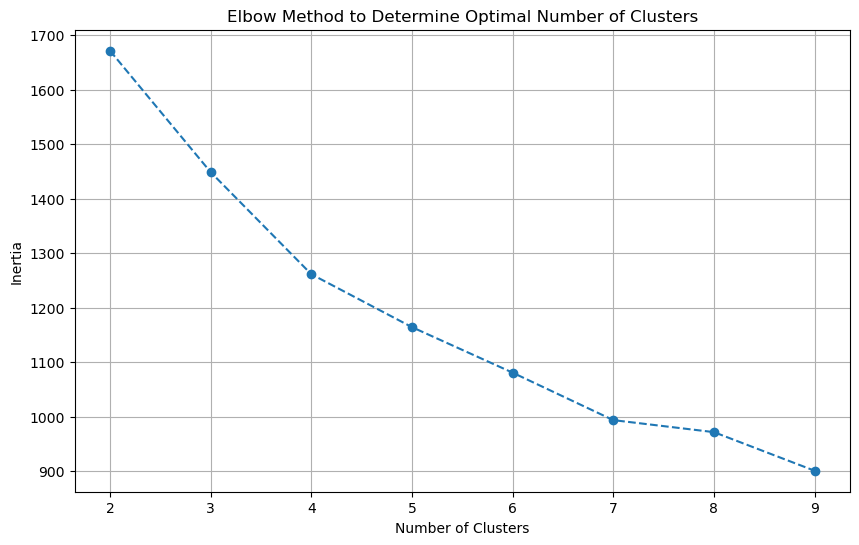

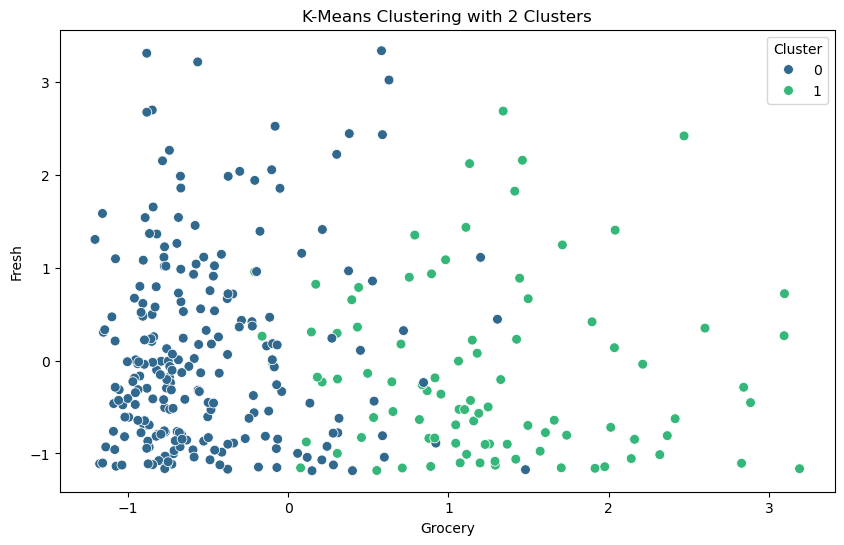

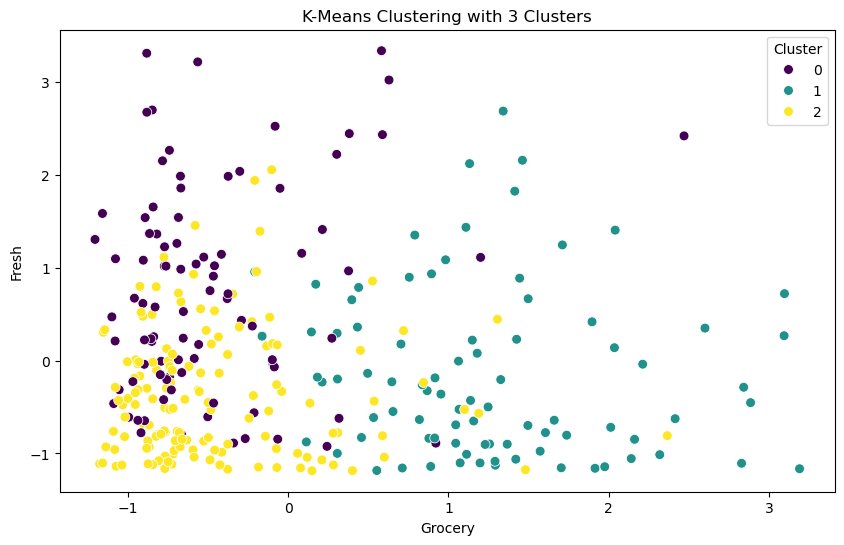

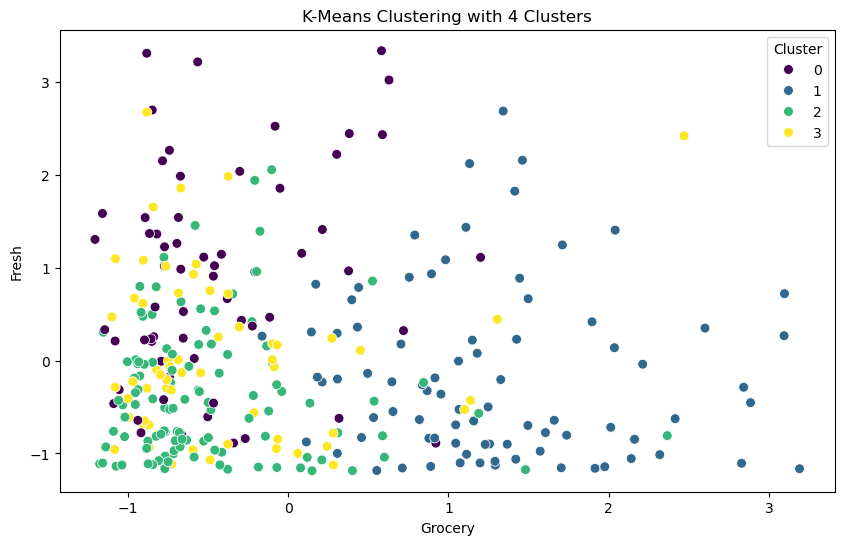

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure customers_scale is a DataFrame for column referencing
customers_scale_df = pd.DataFrame(customers_scale, columns=data_cleaned.columns[:-1])  # Adjust columns as necessary

# Experiment with different numbers of clusters
cluster_range = range(2, 10)
inertia = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customers_scale)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Visualize clusters for selected numbers of clusters
n_clusters_to_visualize = [2, 3, 4]

for n_clusters in n_clusters_to_visualize:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customers_scale)
    labels = kmeans.labels_

    # Use the DataFrame for scatterplot
    customers_scale_df['Cluster'] = labels
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=customers_scale_df, x='Grocery', y='Fresh', hue='Cluster', palette='viridis', s=50)
    plt.title(f"K-Means Clustering with {n_clusters} Clusters")
    plt.xlabel("Grocery")
    plt.ylabel("Fresh")
    plt.legend(title="Cluster")
    plt.show()

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

<Figure size 1000x600 with 0 Axes>

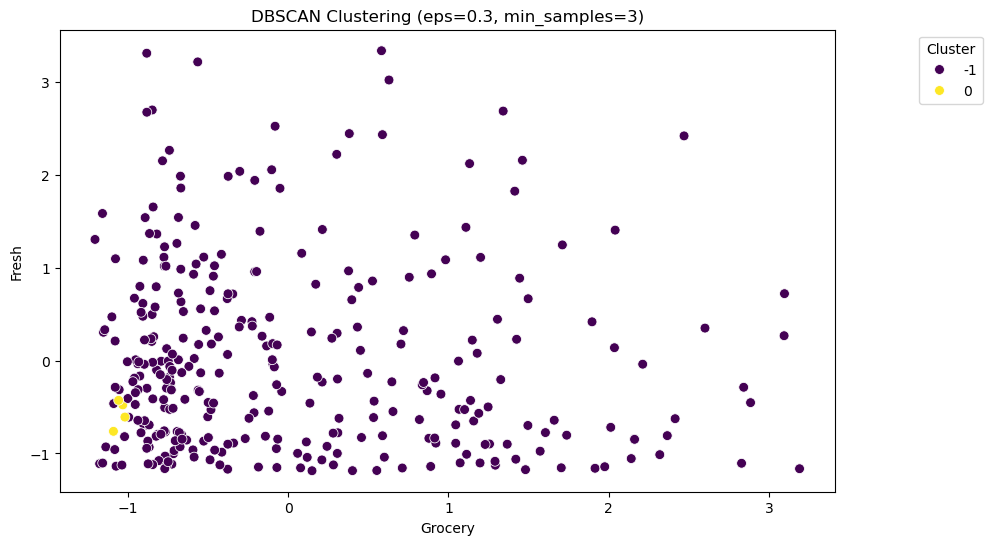

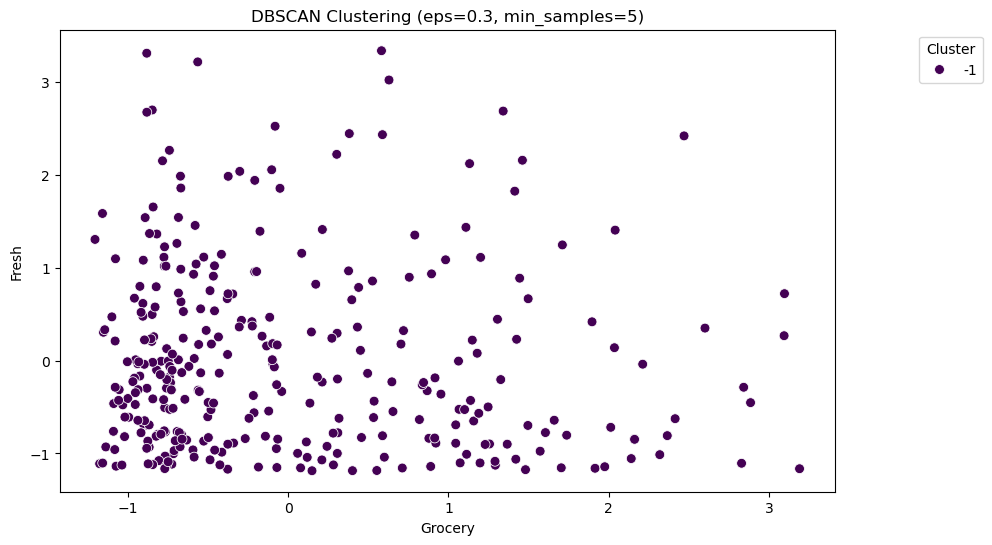

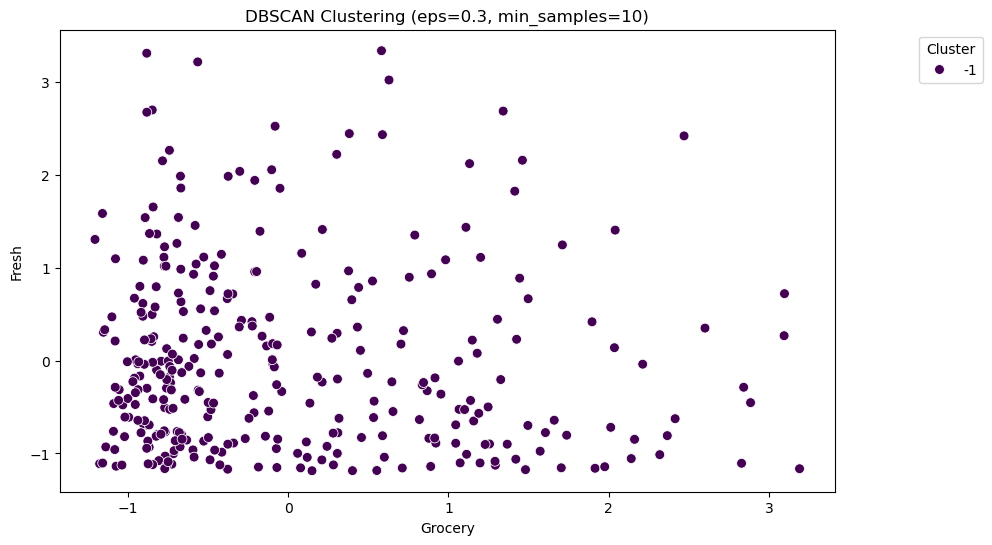

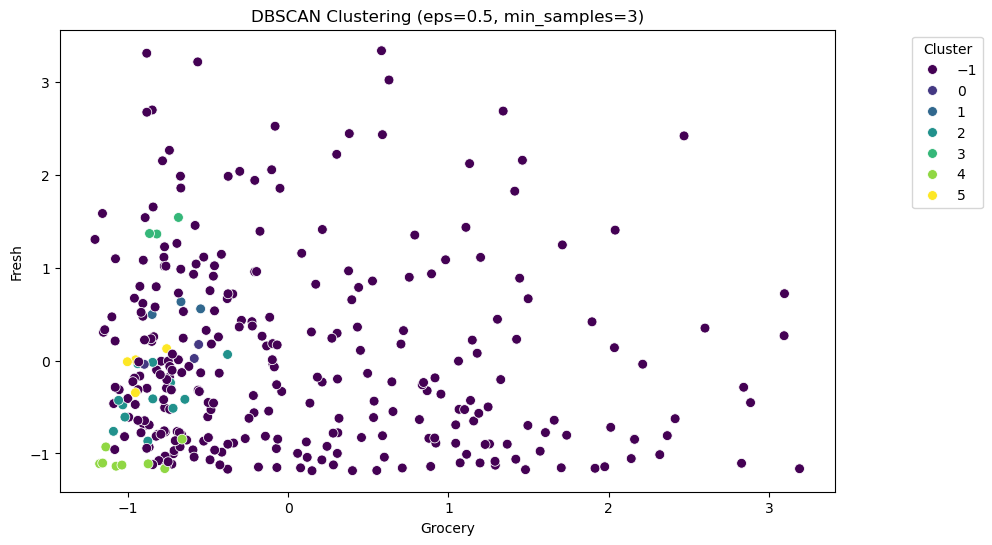

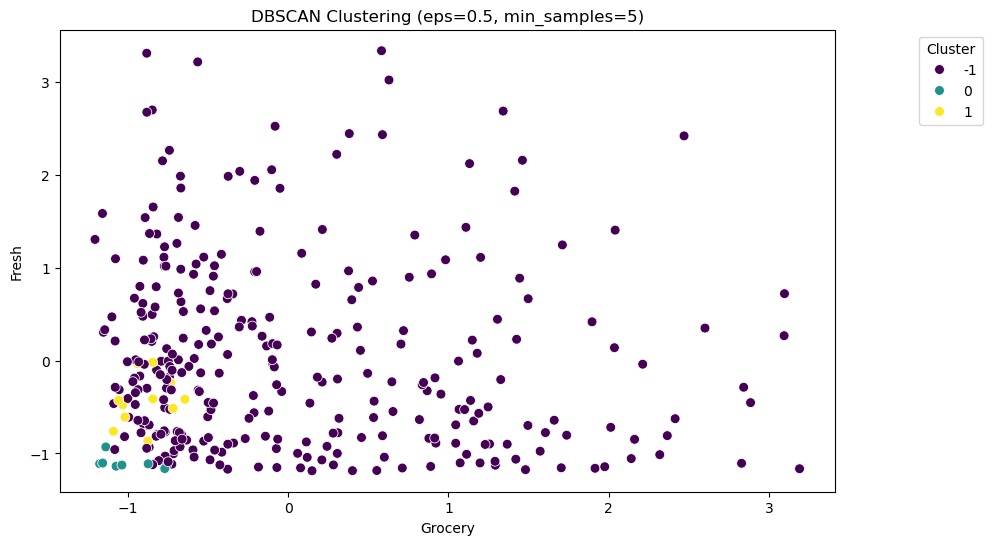

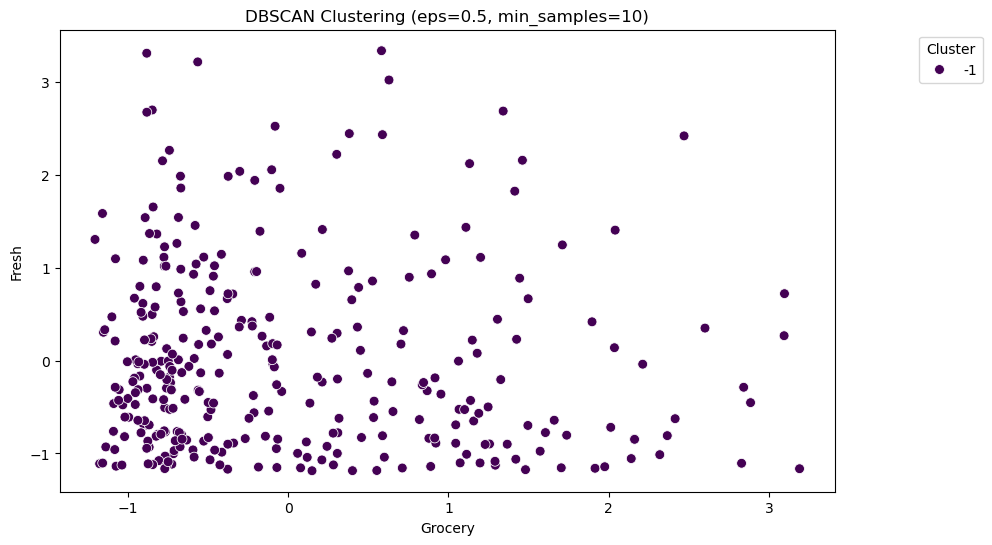

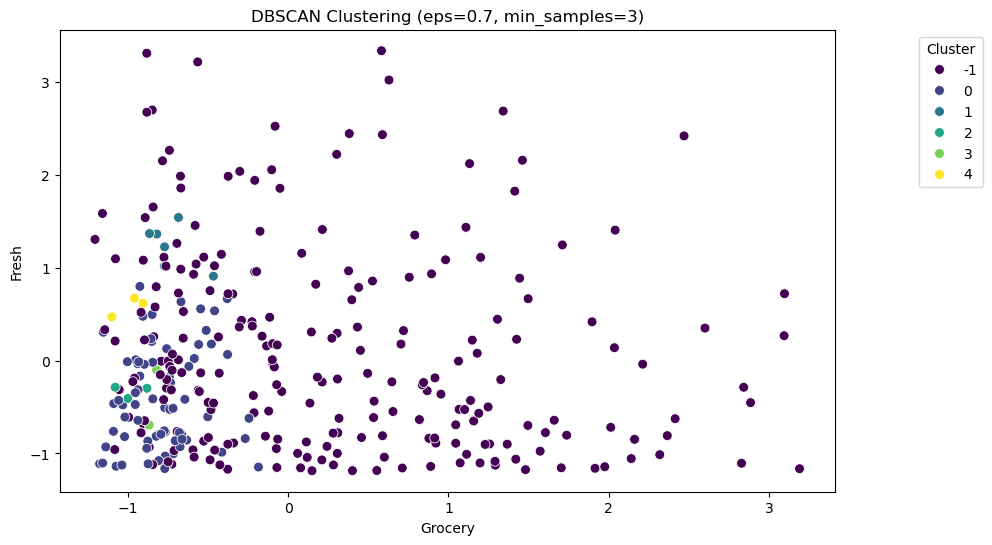

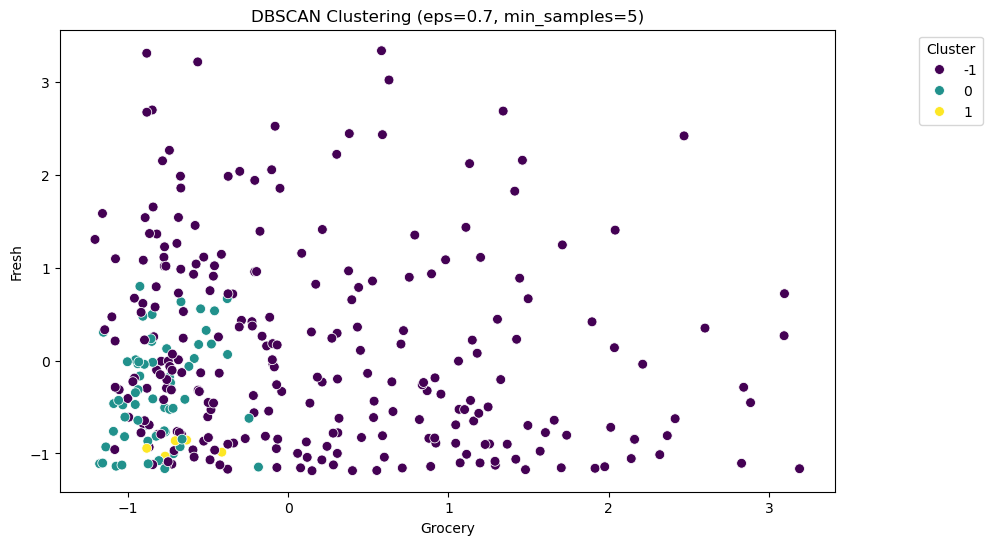

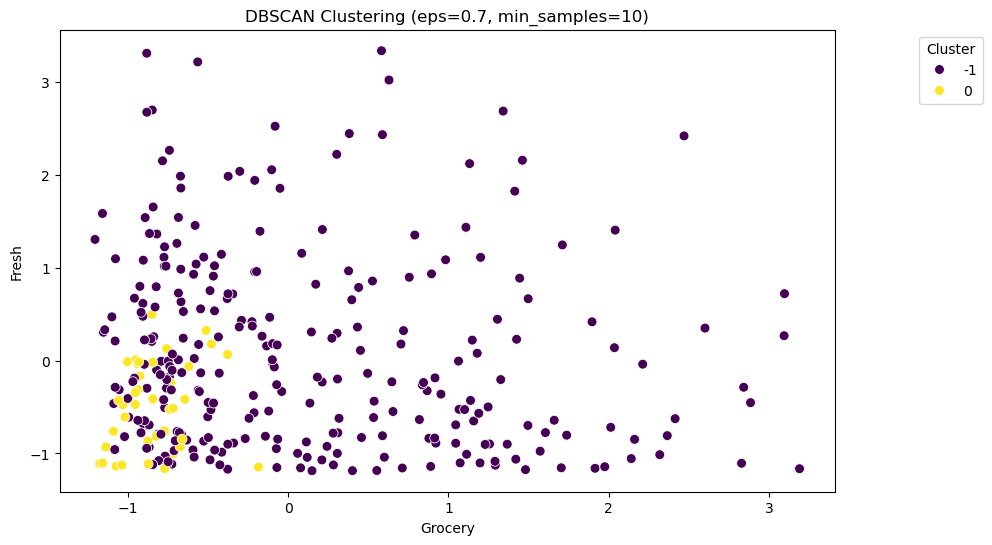

In [37]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure customers_scale is a DataFrame with appropriate column names
customers_scale_df = pd.DataFrame(customers_scale, columns=data_cleaned.columns[:-1])  # Adjust columns accordingly

# Define ranges for eps and min_samples
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]

# Iterate over combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize DBSCAN with the current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(customers_scale)

        # Add the cluster labels to the DataFrame
        customers_scale_df['DBSCAN_Labels'] = dbscan.labels_

        # Create a scatter plot of the clusters
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            data=customers_scale_df,
            x='Grocery',  # Adjust feature names
            y='Fresh',    # Adjust feature names
            hue='DBSCAN_Labels',
            palette='viridis',
            s=50
        )
        plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
        plt.xlabel("Grocery")
        plt.ylabel("Fresh")
        plt.legend(title="Cluster", loc="upper right", bbox_to_anchor=(1.2, 1))
        plt.show()

**Your comment here**

- 